In [7]:
# IMPORTS
from scipy.io.wavfile import read as spread
from scipy.signal import periodogram
from scipy.signal import spectrogram
import numpy as np
import matplotlib.pyplot as plt
from SecondOrderElec import Notch

### SETTINGS

In [8]:
# PARAMETRAGE
PATH_VUVUZELA = './sons/vuvuzela.wav'
PATH_VUVUZELA_SOLO = './sons/vuvuzela_solo.wav' 

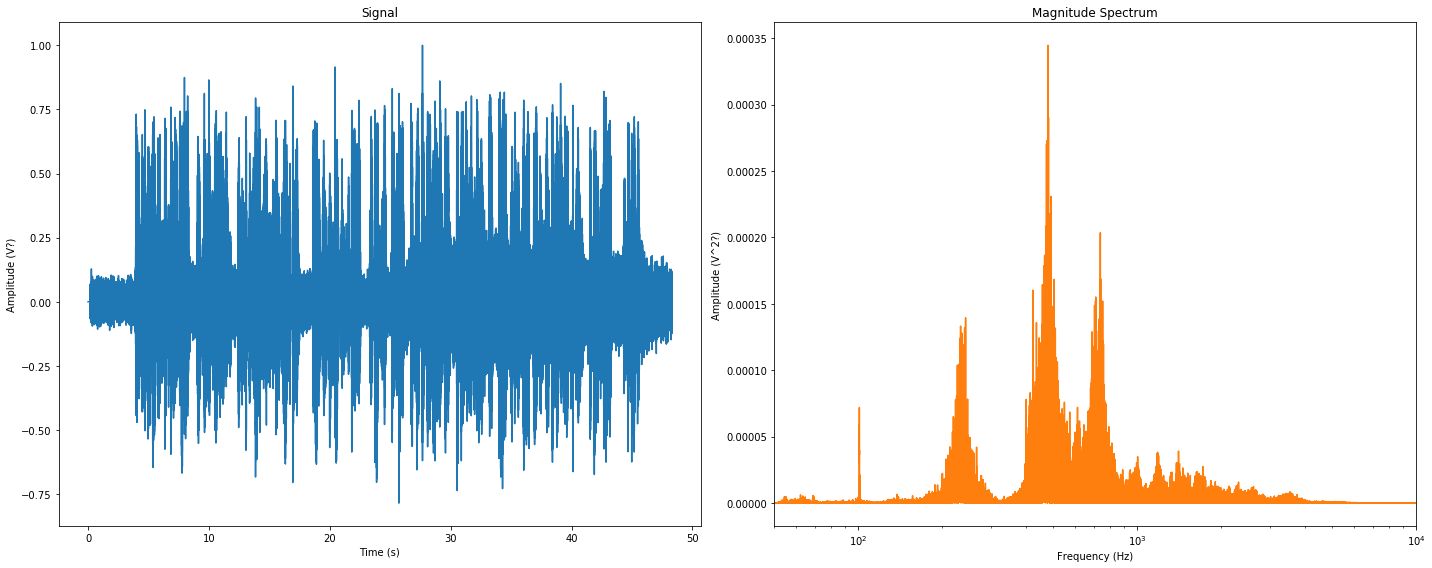

In [9]:
fs, input = spread(PATH_VUVUZELA, mmap=True)
input = input/max(input)
f_fft, input_fft = periodogram(x=input, fs=fs)
dt = 1/fs #time step
t = np.arange(0, dt*len(input), dt) # vecteur temps


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
# plot time signal:
axes[0].set_title("Signal")
axes[0].plot(t, input, color='C0')
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude (V?)")

# plot spectrum
axes[1].set_title("Magnitude Spectrum")
axes[1].semilogx(f_fft, input_fft, color='C1')
axes[1].set_xlim([50, 1e4])
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Amplitude (V^2?)")

fig.tight_layout()
#plt.show()

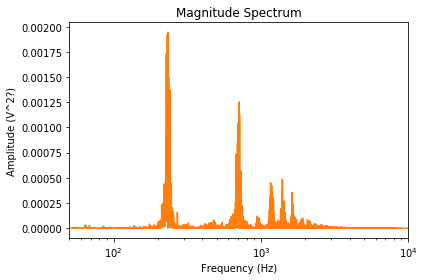

In [23]:
fs, input = spread(PATH_VUVUZELA_SOLO, mmap=True)
input = input/max(input)
f_fft, input_fft = periodogram(x=input, fs=fs)
dt = 1/fs #time step
t = np.arange(0, dt*len(input), dt) # vecteur temps




# plot spectrum
plt.title("Magnitude Spectrum")
plt.semilogx(f_fft, input_fft, color='C1')
plt.xlim([50, 1e4])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (V^2?)")


plt.tight_layout()

In [33]:
fk = [
    234,
    700,
    1180,
    1408
]

The fundamental note is Bb2 in the tempered scale.

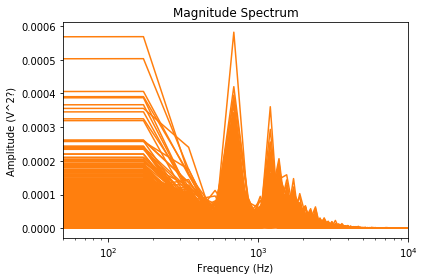

In [12]:
fs, input = spread(PATH_VUVUZELA_SOLO, mmap=True)
input = input/max(input)
f_fft, t_fft, input_fft = spectrogram(x=input, fs=fs)
dt = 1/fs #time step
t = np.arange(0, dt*len(input), dt) # vecteur temps




# plot spectrum
plt.title("Magnitude Spectrum")
plt.semilogx(f_fft, input_fft, color='C1')
plt.xlim([50, 1e4])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (V^2?)")


plt.tight_layout()

# 2.2 RLC 


<center>
<img src='./img/RLC.png'>
</center>

$$
\bar T (p) = \frac{1+LC p²}{1 + \frac{L}{R}p + LC p²}
$$

Calcul de $m$

$$
m = \frac{L}{2R*\sqrt{LC}}
$$

Calcul de $f0$

$$
w0 = \frac{1}{\sqrt{LC}}
$$

Calcul des pôles


$$
p1 = *p2
$$
$$
p2 = \frac{-\frac{L}{R} \pm \sqrt{\frac{L²}{R²}-4LC}}{2LC}
$$

Calcul zéros

$$
z² = \frac{1}{LC}
$$


$$
z = \pm \sqrt{\frac{1}{LC}}
$$

When $w$ is close to $w0$. The magnitude of the frequency response become almost null. 
$$
\bar T (w0) = \frac{2}{2+2m}
$$

$$
BR = \frac{1}{2 \pi RC}
$$


$$
T_{BF} = T_{HF} = 1
$$

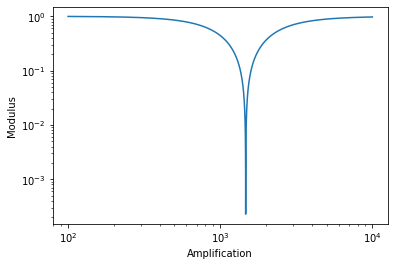

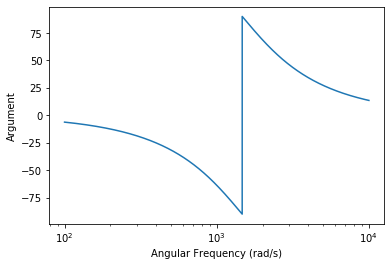

In [14]:
fi_ = Notch(T0=1, m= 0.8, w0=fk[0]*2*np.pi)
t,s = fi_.freqresp()

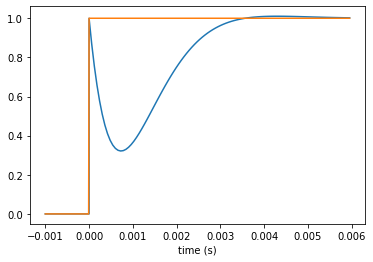

In [15]:
t,s = fi_.step()

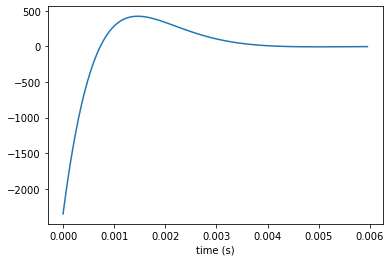

In [16]:
t,s = fi_.impulse()

2.2.2 Analyse de la mise en cascade

In [36]:
def L(m,R, f0):
    return np.sqrt(
        ((m**2)*(R**2))/((np.pi**2)*(f0**2))
    )

def C(m,R, f0):
    return 1 / (L(m,R, f0)*4*(np.pi**2)*(f0**2))
R, m = 10000, 1
print(f"For all values of f0 , R={R}, m={m}")

for i, f0 in enumerate(fk):
    C_ = C(m,R, f0)
    L_ = L(m,R, f0)




    print(f"For  {f0}hz => C{i+1}={C_}, L{i+1}={L_}")

For all values of f0 , R=10000, m=1
For  234hz => C1=3.400746647262721e-08, L1=13.602986589050884
For  700hz => C2=1.1368210220849665e-08, L2=4.547284088339867
For  1180hz => C3=6.743853520843022e-09, L3=2.697541408337209
For  1408hz => C4=5.651809058661056e-09, L4=2.2607236234644223


# TWIN T PASSIF

## Transfer function 

We used the node potential in A and B 

<center><img src="img/v-a.png" height="300"></center>

$$Vb= \frac{(Ve+Vs)}{2(1+RCp)}$$

$$Va= \frac{R(Ve+Vs)Cp}{2(1+RCp)}$$

Under the assumption that the output load is zero, the potential of the nodes is set at $V_s$

$$
\overline{T} (p)= \frac{1+(RCp)^2}{1+4RCp+(RCp)^2}
$$


Dumping coefficient : $ 4RC = 2mRC <=> m=2 $ 

On a également : $ \omega _0 = \frac{1}{RC} $

$$
p1 = -\frac{2+\sqrt{3}}{RC}
$$

$$
p2 = -\frac{2-\sqrt{3}}{RC}
$$


$$
z1 = \frac{i}{RC}
$$

$$
z2 = -\frac{i}{RC}
$$

$$
Band \space rejected = 2 m \omega _0 = \frac{4}{RC}
$$



$ |H(p)| $ tend to 1 at LF and HF